# **ML models for predicting heart disease in patients**

## Machine learning and data mining course: 364-2-1651 IEM Ben gurion university

### Submitted by:

Names: Inbal Karibian, Adi Yogev Golbari, Arad Peleg


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.4 MB/s eta 0:00:00


# Importing Libraries


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
warnings.warn('')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from matplotlib.colors import LinearSegmentedColormap
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
import optuna
from sklearn.inspection import permutation_importance

seed_value = 123; np.random.seed(seed_value); #set_random_seed(seed_value)
rng = np.random.RandomState(123)


# Importing Data

In [ ]:
#Importing Data from Arads Git-Hub directory (HD - heart diseases)
dataHD = pd.read_csv("https://raw.githubusercontent.com/aradpls/MLDM--ML-models-for-predicting-heart-disease-in-patients/main/heart_statlog_cleveland_hungary_final.csv")
dataHD

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# Data Understanding

In [ ]:
#Descriptive statistics
dataHD.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
#Data info to data type of each column
dataHD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
#checking if thare is a emapty cells in data
dataHD.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

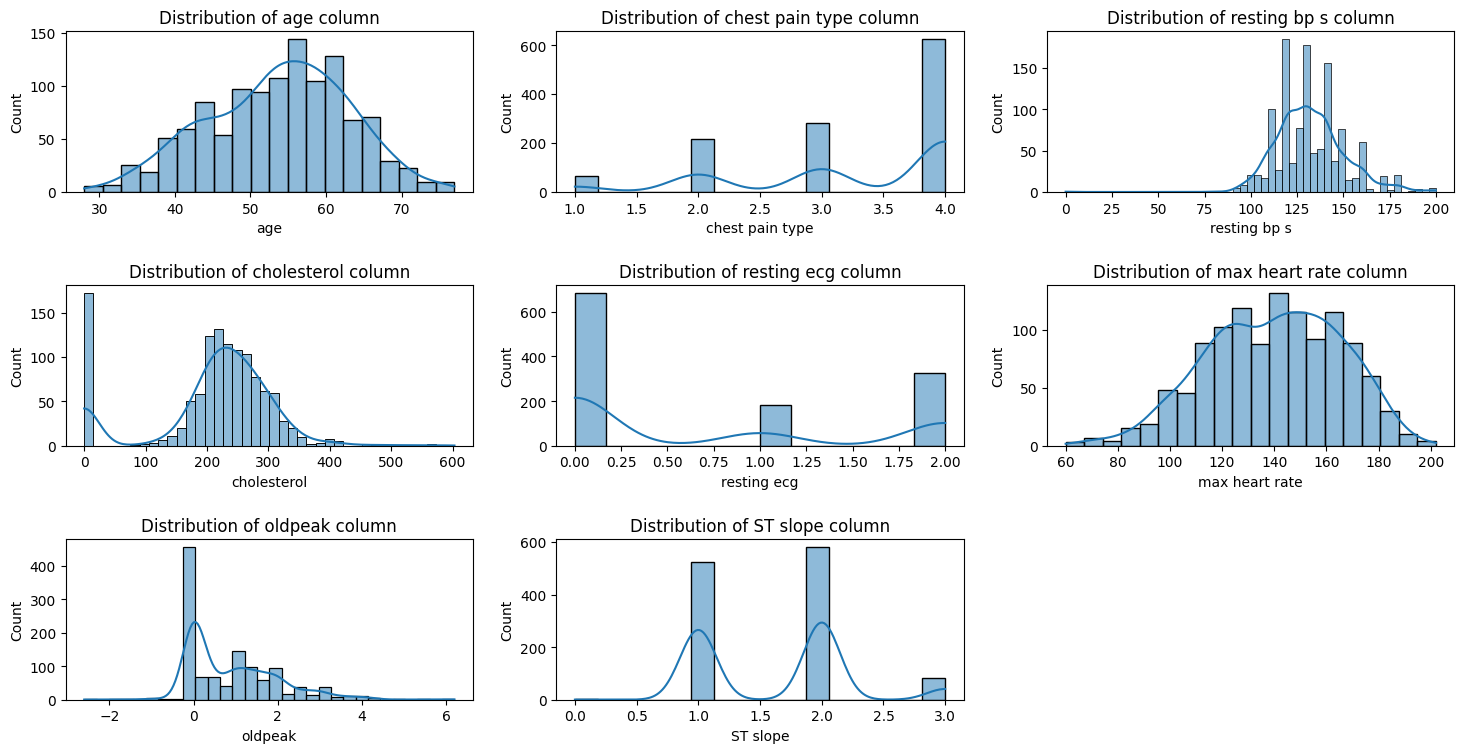

In [ ]:
#Showing disribution of non binary cols

#array of columns for loop
cols = ['age','chest pain type', 'resting bp s',
        'cholesterol', 'resting ecg',
       'max heart rate', 'oldpeak', 'ST slope']

#crearing plot for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(cols, 1):
    plt.tight_layout(pad=2.0)
    plt.subplot(4, 3, i)
    sns.histplot(data=dataHD, x=column, kde=True)
    plt.title(f'Distribution of {column} column')


Text(0.5, 1.0, 'Distribution of cholesterol column')

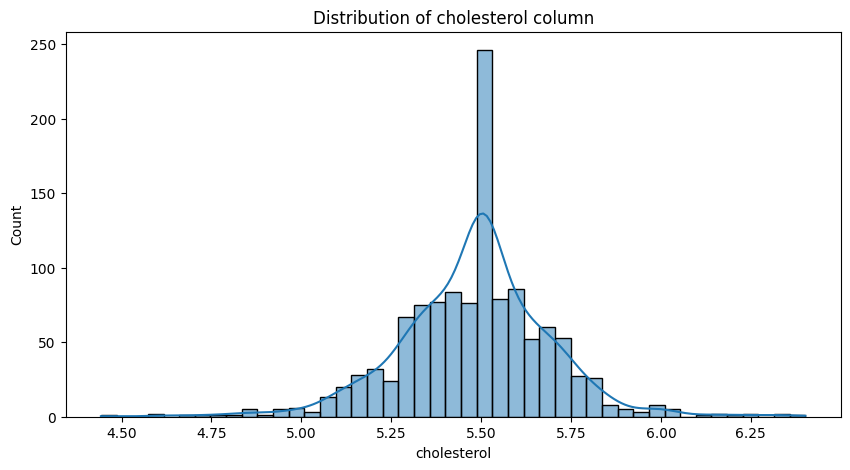

In [ ]:
#as you can see we have a lot zeros in cholestrol which is not possilbe for a humen we will put the mean value in this cells
#mean  of the cholesterol column excluding zeros
mean_cholesterol = dataHD[dataHD['cholesterol'] != 0]['cholesterol'].mean()
# mean_cholesterol = df[df['cholesterol'] != 0]['cholesterol'].median()

# Replace zero values with the mean (or median)
dataHD['cholesterol'] = dataHD['cholesterol'].replace(0, mean_cholesterol)

# Apply log transformation
dataHD['cholesterol'] = np.log(dataHD['cholesterol'])

#crearing plot for each column
plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)
sns.histplot(data=dataHD, x='cholesterol', kde=True)
plt.title(f'Distribution of cholesterol column')


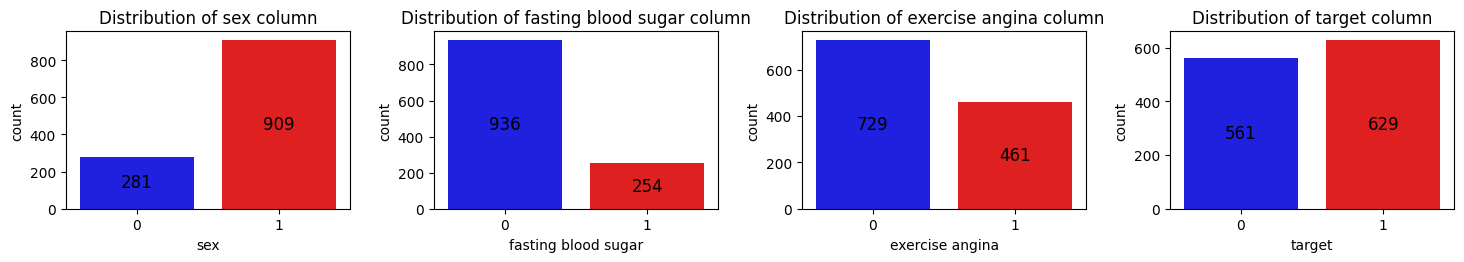

In [ ]:
#Showing barplot of binary cols including taregt distribution

#array of columns for loop
colsb = ['sex', 'fasting blood sugar', 'exercise angina' , 'target']

#crearing plot for each column
plt.figure(figsize=(15, 10))

# Define a color palette
colors = ["blue", "red"]

for i, column in enumerate(colsb, 1):
    plt.tight_layout(pad=2.0)
    plt.subplot(4, 4, i)
    ax = sns.countplot(data=dataHD, x=column, palette=colors)
    plt.title(f'Distribution of {column} column')


# Annotate the counts on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center', fontsize=12, color='black')

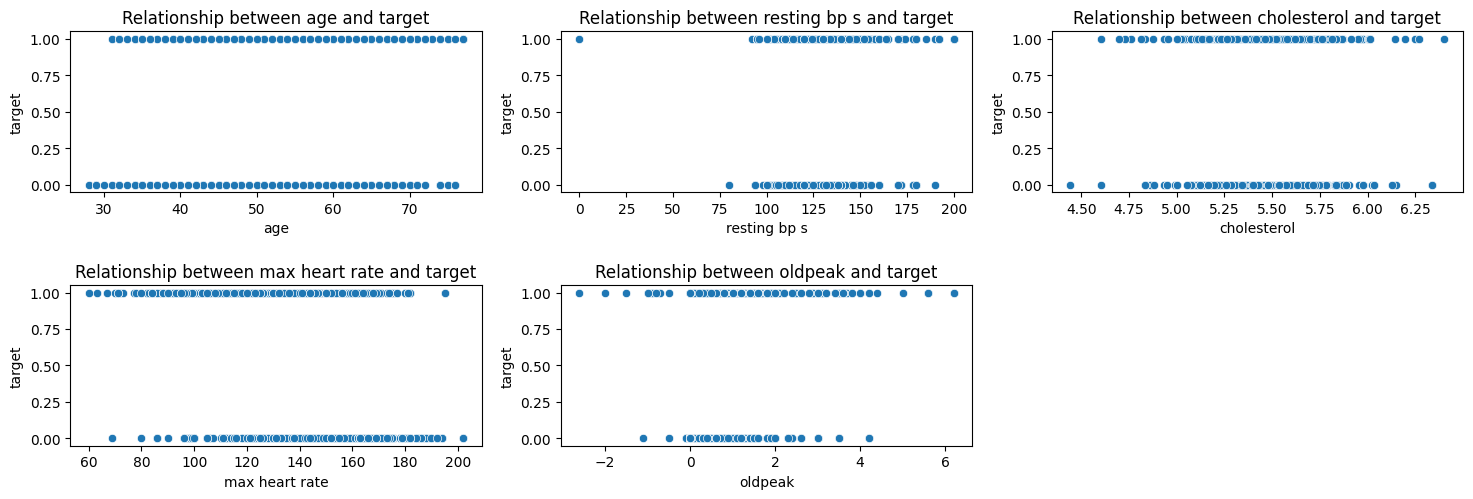

In [ ]:
#Showing scatterplot cols against target column to see if thare is a trend for importance of fetures

#array of columns for loop
colsdot = ['age','resting bp s','cholesterol','max heart rate', 'oldpeak',]

# Creating plot for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(colsdot, 1):
    plt.tight_layout(pad=2.0)
    plt.subplot(4, 3, i)
    sns.scatterplot(data=dataHD, x=column, y='target')
    plt.title(f'Relationship between {column} and target')


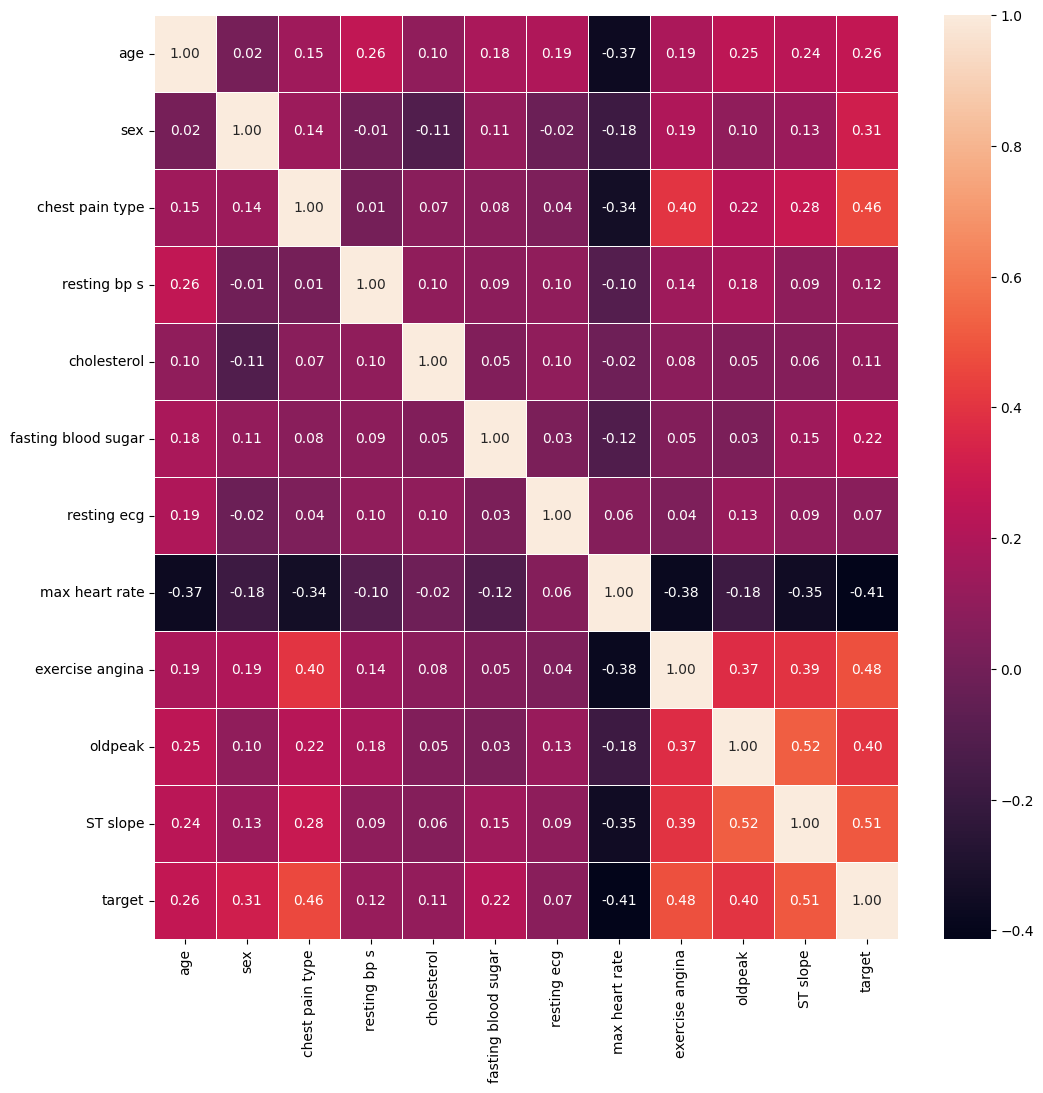

In [ ]:
#Showing correltion between columns
plt.figure(figsize=[12, 12])
sns.heatmap(dataHD.corr(),annot=True,linewidth=.5,fmt='.2f')
plt.show()

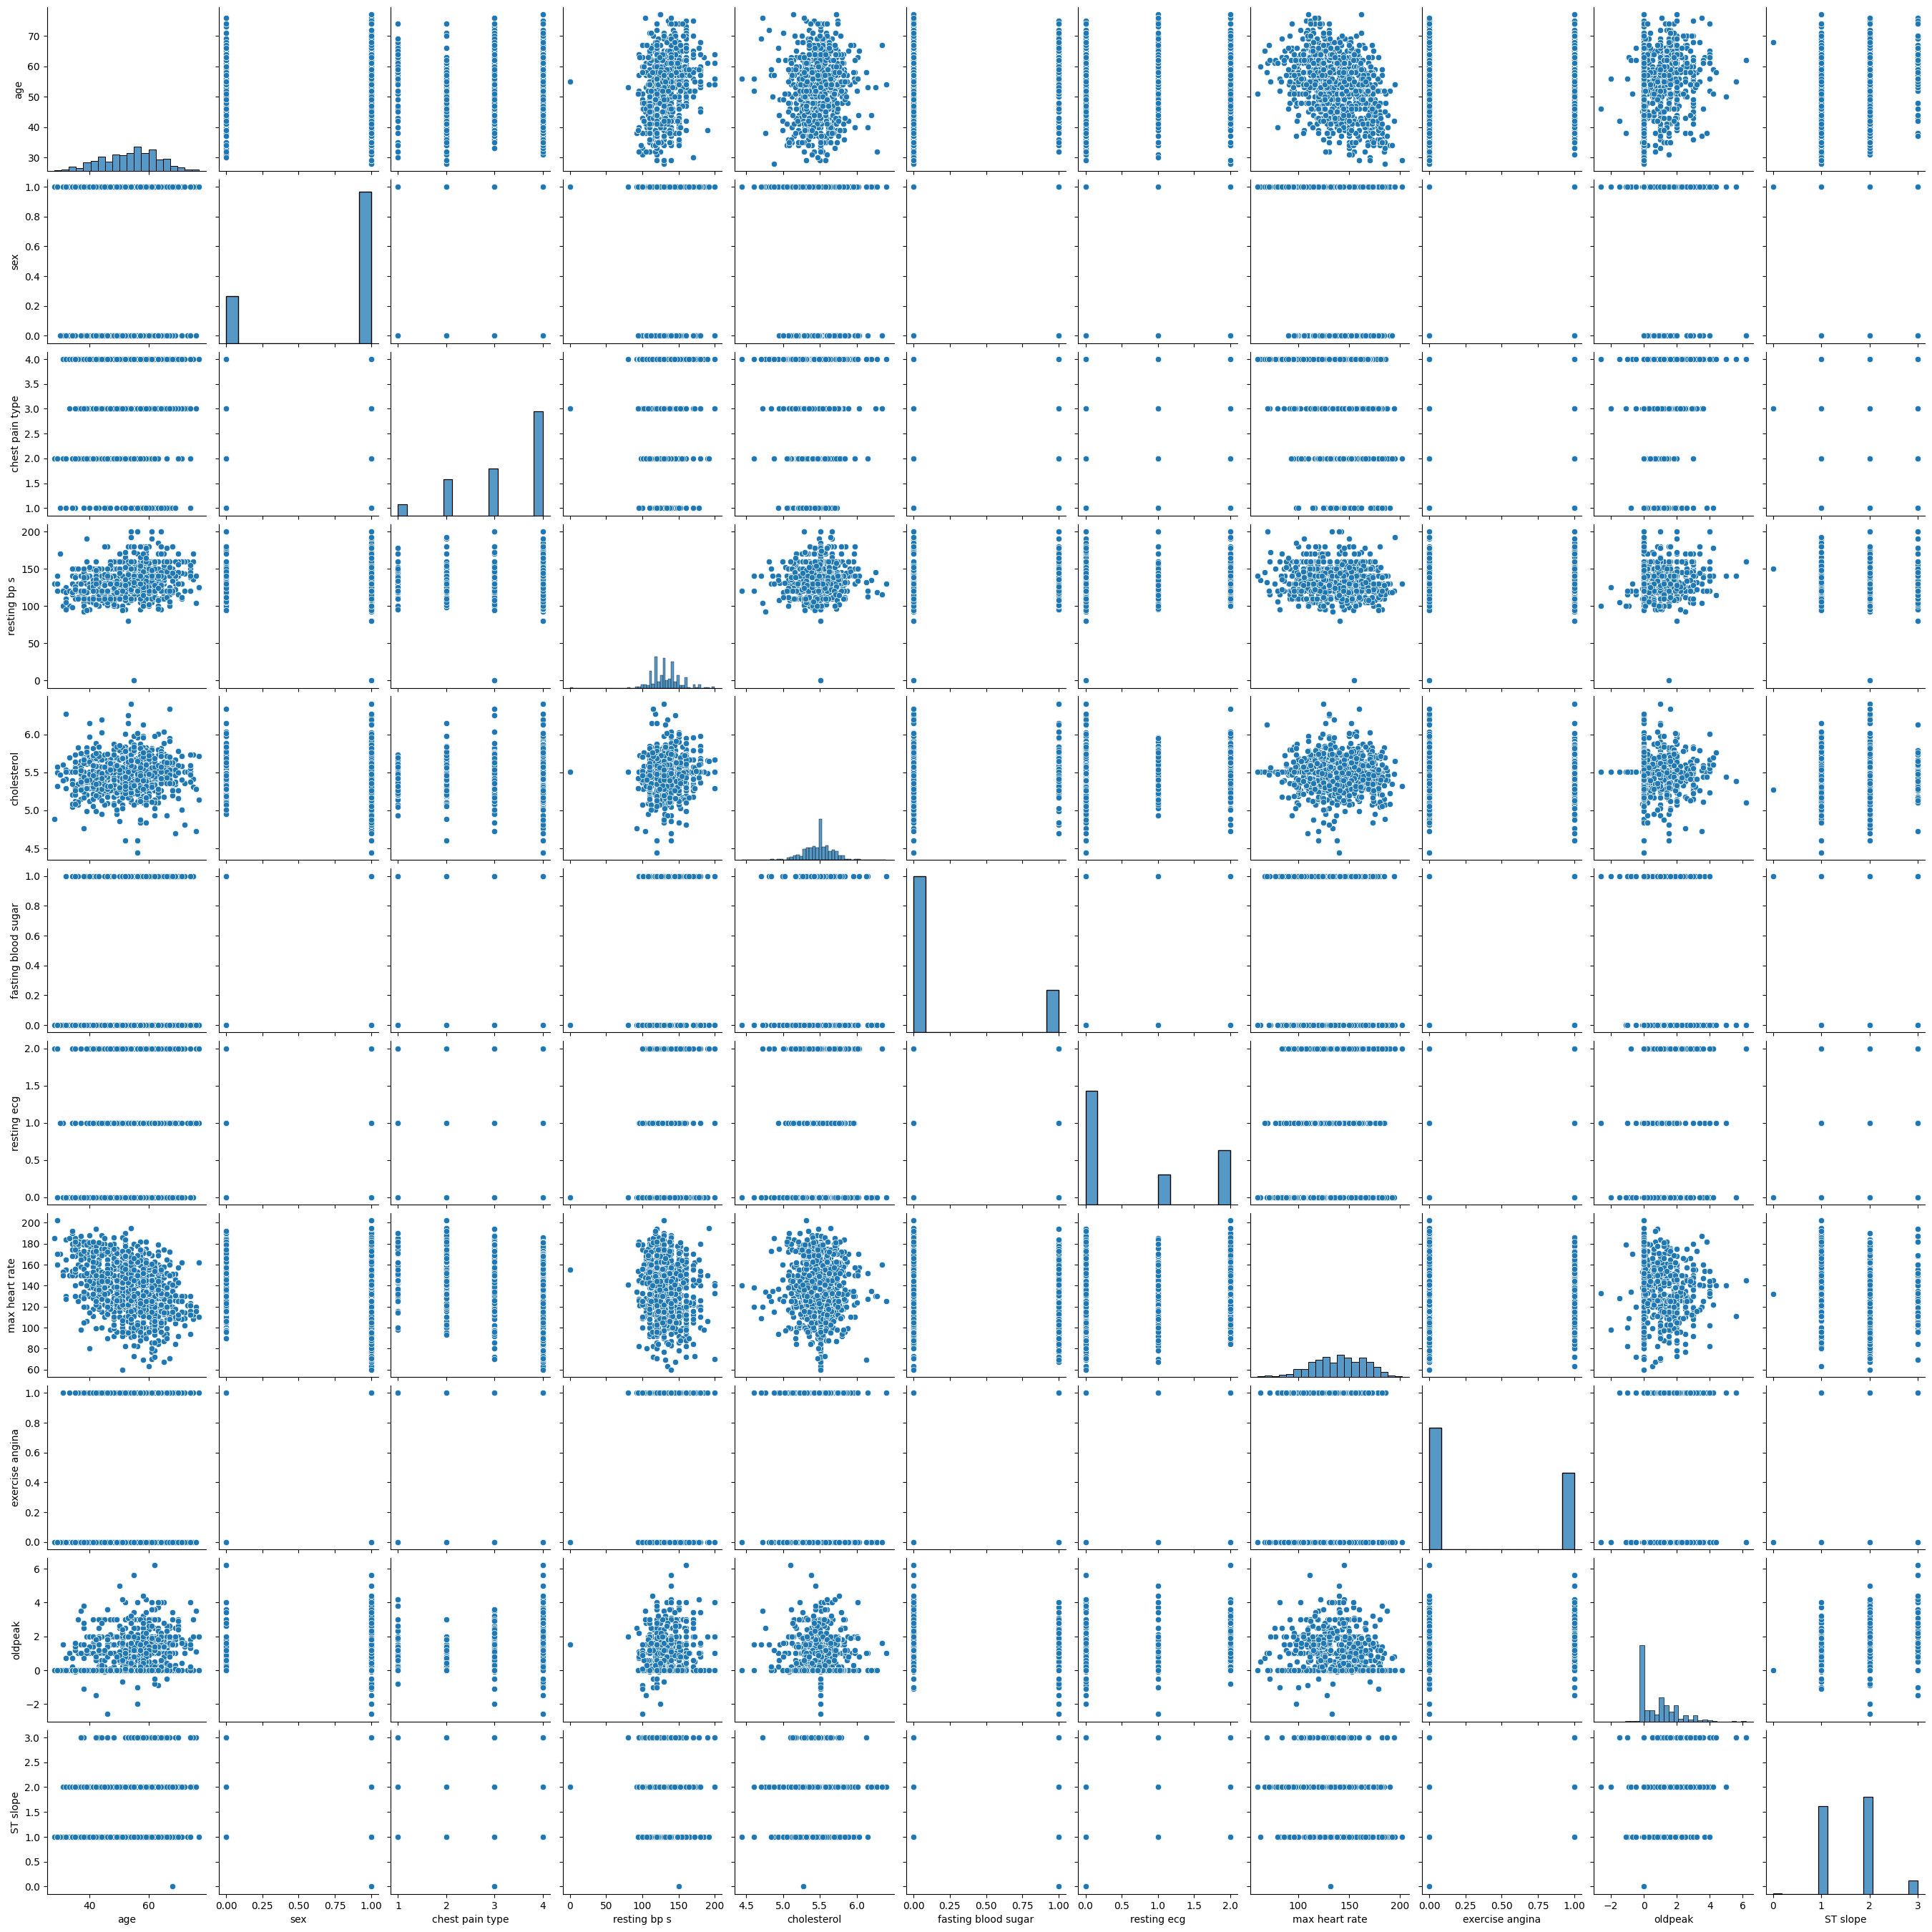

In [ ]:
#cheking the retionshiop btween pairs in columns for the option to create new fetures
# Assuming 'target' is the name of the target column
columns_to_include = dataHD.drop(columns=['target'])

# Create pairplot excluding the target column
sns.pairplot(columns_to_include)
plt.show()

# Data Preparation

In [ ]:
#Tefining dependent Y and indepndent varibles (feture matrix)
#Feture matrix
X = dataHD.iloc[:, :-1]
#Target value
y = dataHD['target']

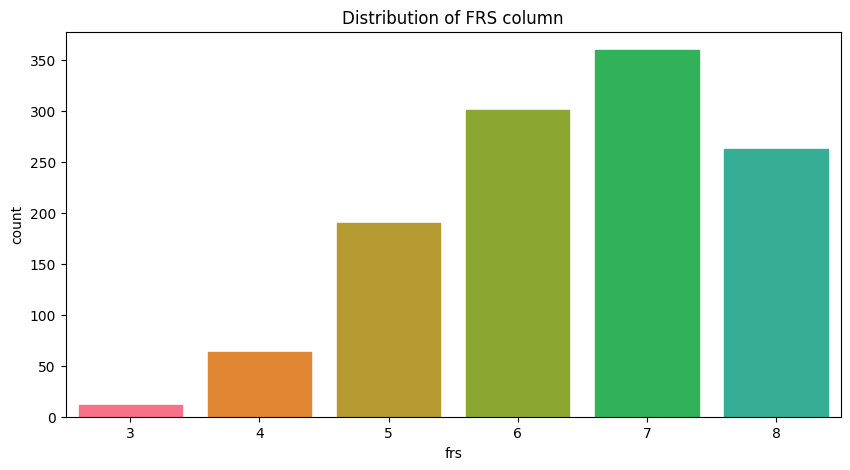

In [ ]:
# Define the function to calculate the FRS
def calculate_frs(row):
    # Age points based on Framingham tables (example ranges)
    if row['age'] < 35:
        age_points = 1
    elif row['age'] < 45:
        age_points = 2
    elif row['age'] < 55:
        age_points = 3
    else:
        age_points = 4

    # Cholesterol points based on example ranges
    if row['cholesterol'] < 200:
        cholesterol_points = 1
    elif row['cholesterol'] < 240:
        cholesterol_points = 2
    else:
        cholesterol_points = 3

    # Systolic BP points based on example ranges
    if row['resting bp s'] < 120:
        systolic_bp_points = 1
    elif row['resting bp s'] < 140:
        systolic_bp_points = 2
    else:
        systolic_bp_points = 3

    # Fasting blood sugar points
    fasting_sugar_points = 1 if row['fasting blood sugar'] > 120 else 0

    # Combine the points
    frs = age_points + cholesterol_points + systolic_bp_points + fasting_sugar_points

    # Convert to integer
    return int(round(frs))

# Add the FRS to the dataset
X['frs'] = X.apply(calculate_frs, axis=1)

# Define a custom palette with 11 distinct colors
colors = sns.color_palette("husl", 11)

# Create the plot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=X, x='frs', palette=colors)
plt.title('Distribution of FRS column')

# Set different colors for each bar
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

plt.show()

In [ ]:
# Strip any leading/trailing whitespace from column names
X.columns = X.columns.str.strip()

# Check the column names again
print("Column names:", X.columns)

# Ensure 'ST slope' column exists
if 'ST slope' in X.columns:
    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse=False)

    # Fit and transform the data
    encoded_data = encoder.fit_transform(X[['ST slope']])

    # Create a DataFrame with the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ST slope']))

    # Concatenate the original DataFrame (without 'ST slope' column) with the encoded DataFrame
    X = pd.concat([X.drop(columns=['ST slope']), encoded_df], axis=1)

Column names: Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'frs'],
      dtype='object')


In [ ]:
# Define the function to calculate the TCRS

# Create a copy of the original DataFrame
original_data = dataHD.copy()

# Apply logarithmic transformation to the dataset
log_transformed_data = original_data.apply(np.log1p)

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the columns
normalized_data = pd.DataFrame(scaler.fit_transform(original_data), columns=original_data.columns)

# Assuming target_variable is the name of your target variable
target_correlation = original_data.corrwith(original_data['target'])

# Multiply correlation by 100 to get factor weight
factor_weight = target_correlation * 100

#delete target column
factor_weight = factor_weight.drop('target')
# Add the factor_weight column to the original DataFrame
original_data['factor_weight'] = factor_weight

# Print the updated DataFrame to verify the changes
print(factor_weight)

age                    26.202877
sex                    31.126680
chest pain type        46.012698
resting bp s           12.141476
cholesterol            10.896751
fasting blood sugar    21.669509
resting ecg             7.305948
max heart rate        -41.327819
exercise angina        48.146660
oldpeak                39.838522
ST slope               50.560797
dtype: float64


In [ ]:
# Iterate over each row in the DataFrame
for index, row in original_data.iterrows():
    # Calculate TCRS for the current row
    original_data.loc[index, 'TCRS'] = (factor_weight * row).sum()

TCRS = original_data['TCRS']
X['TCRS'] = original_data['TCRS']
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,frs,ST slope_0,ST slope_1,ST slope_2,ST slope_3,TCRS
0,40,1,2,140,5.666427,0,0,172,0,0.0,6,0.0,1.0,0.0,0.0,-4125.004703
1,49,0,3,160,5.192957,0,0,156,0,1.0,7,0.0,0.0,1.0,0.0,-2884.978135
2,37,1,2,130,5.645447,0,1,98,0,0.0,5,0.0,1.0,0.0,0.0,-1259.692138
3,48,0,4,138,5.365976,0,0,108,1,1.5,6,0.0,0.0,1.0,0.0,-1078.594190
4,54,1,3,150,5.273000,0,0,122,0,0.0,7,0.0,1.0,0.0,0.0,-1528.633087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,5.575949,0,0,132,0,1.2,5,0.0,0.0,1.0,0.0,-2653.753403
1186,68,1,4,144,5.262690,1,0,141,0,3.4,8,0.0,0.0,1.0,0.0,-1766.288579
1187,57,1,4,130,4.875197,0,0,115,1,1.2,7,0.0,0.0,1.0,0.0,-1215.367602
1188,57,0,2,130,5.463832,0,2,174,0,0.0,7,0.0,0.0,1.0,0.0,-3851.787795


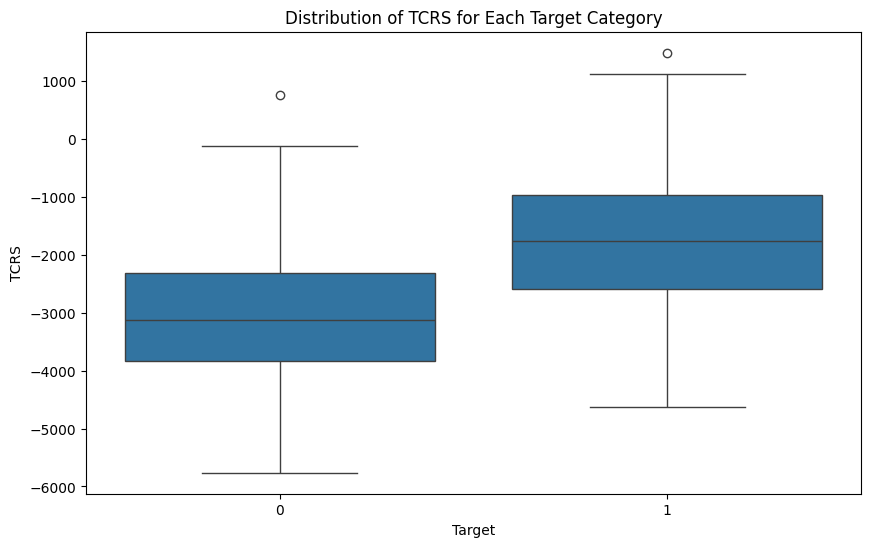

In [ ]:
#printg plot for dist of TCRS column with copyied data frames
X_copy = X.copy()
Y_copy = y.copy()

X_copy['target'] = Y_copy

# Assuming 'target' is your target variable
# Plot the distribution of TCRS for each target category
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='TCRS', data=X_copy)
plt.title('Distribution of TCRS for Each Target Category')
plt.xlabel('Target')
plt.ylabel('TCRS')
plt.show()

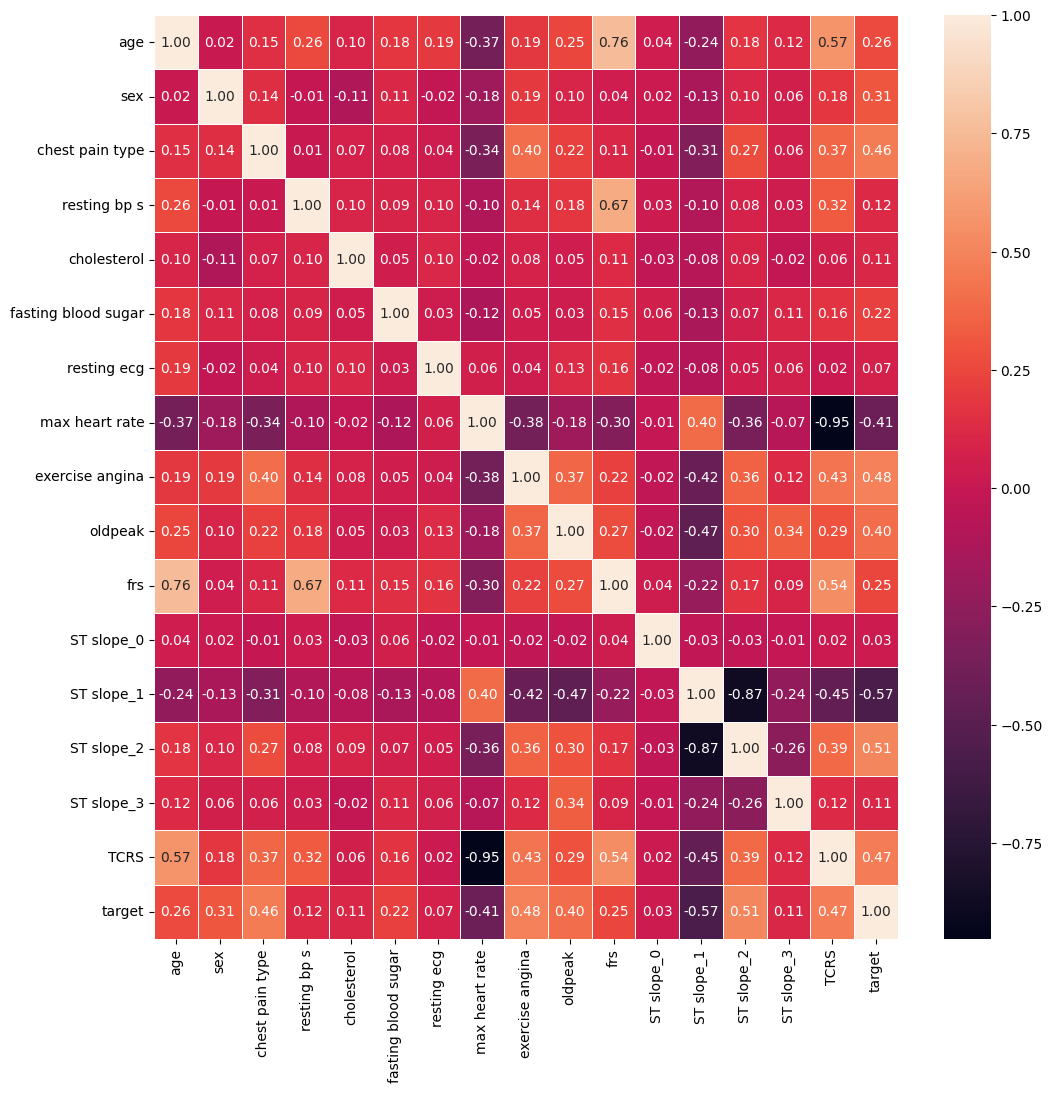

In [ ]:
#Showing correltion between columns with new columns
plt.figure(figsize=[12, 12])
sns.heatmap(X_copy.corr(),annot=True,linewidth=.5,fmt='.2f')
plt.show()

In [ ]:
#Data info to data type of each column
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   float64
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  frs                  1190 non-null   int64  
 11  ST slope_0           1190 non-null   float64
 12  ST slope_1           1190 non-null   float64
 13  ST slope_2           1190 non-null   float64
 14  ST slope_3           1190 non-null   float64
 15  TCRS                 1190 non-null   f

# Modeling

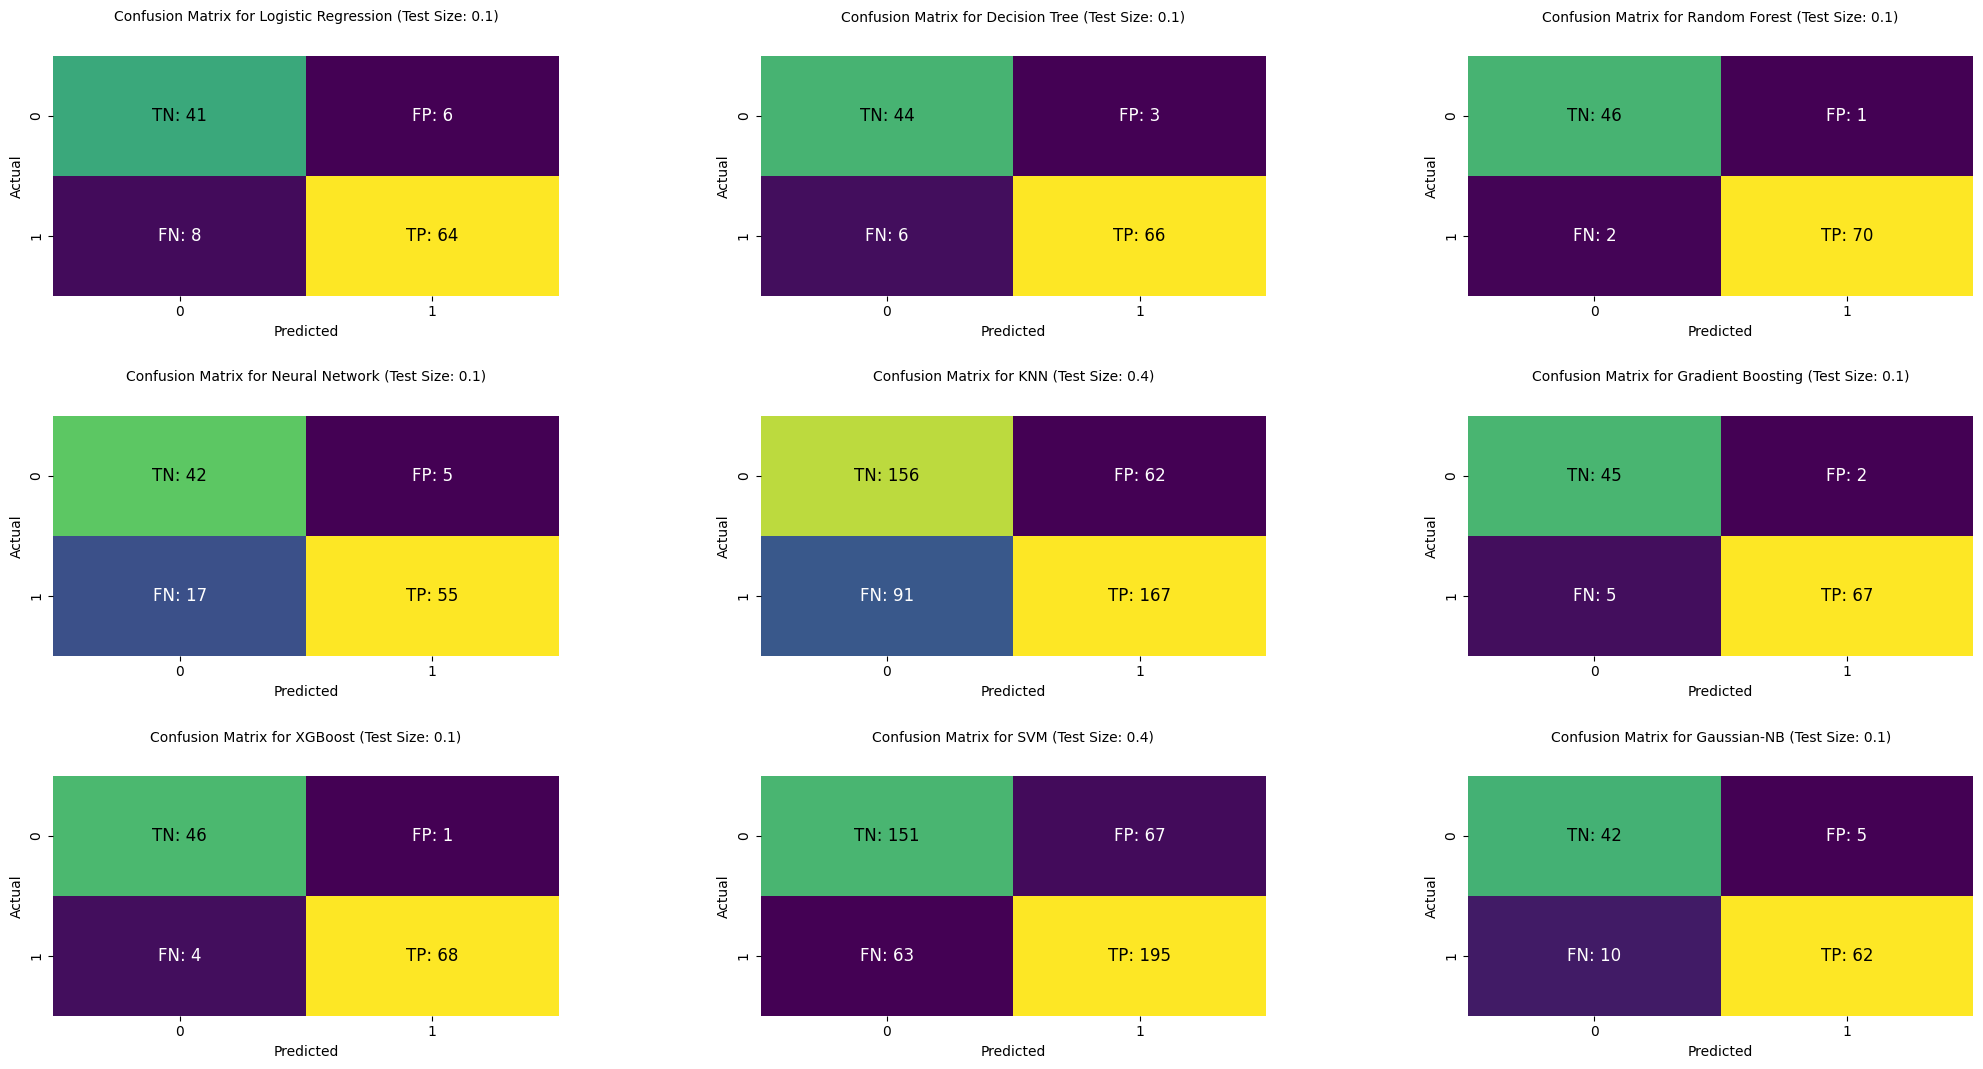

In [ ]:

# Defining the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Neural Network', MLPClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgb.XGBClassifier()),
    ('SVM', SVC()),
    ('Gaussian-NB', GaussianNB())
]

# Defining a list of possible test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Initialize a dictionary to store the best test size and metrics for each model
best_model_results = {}

# Custom colormap similar to the uploaded image (yellow and purple)
colors = ["#440154", "#3B528B", "#21908C", "#5DC863", "#FDE725"]
n_bins = 100  # Discretizes the interpolation into bins
cmap_name = 'custom_cmap'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Iterate over each model
for model_name, model in models:
    best_accuracy = 0
    best_test_size = 0
    best_metrics = {}
    best_conf_matrix = None

    # Iterate over each test size
    for test_size in test_sizes:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        predictions = model.predict(X_test)

        # Evaluate the model
        recall = recall_score(y_test, predictions)
        accuracy = accuracy_score(y_test, predictions)
        precision = precision_score(y_test, predictions, zero_division=1)
        F1_score = f1_score(y_test, predictions)

        # Check if this test size gives better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_test_size = test_size
            best_metrics = {
                "Recall": recall,
                "Accuracy": accuracy,
                "Precision": precision,
                "F1_score": F1_score
            }
            best_conf_matrix = confusion_matrix(y_test, predictions)

    # Store the best test size and metrics for this model
    best_model_results[model_name] = {
        "Best Test Size": best_test_size,
        "Metrics": best_metrics,
        "Confusion Matrix": best_conf_matrix,
        "Trained Model": model
    }

# Create subplots for each model
num_models = len(models)
fig, axes = plt.subplots(3, 3, figsize=(24, 12))

# Flatten the axes array for easy iteration
axes = axes.ravel()

for ax, (model_name, _) in zip(axes, models):
    best_conf_matrix = best_model_results[model_name]["Confusion Matrix"]
    sns.heatmap(best_conf_matrix, annot=False, fmt='d', cmap=custom_cmap, ax=ax, cbar=False)
    ax.set_title(f'Confusion Matrix for {model_name} (Test Size: {best_model_results[model_name]["Best Test Size"]})', fontsize='medium', pad = 25)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    # Annotate with TP, TN, FP, FN
    for i in range(best_conf_matrix.shape[0]):
        for j in range(best_conf_matrix.shape[1]):
            if i == j:
                if i == 0:
                    ax.text(j + 0.5, i + 0.5, f'TN: {best_conf_matrix[i, j]}',
                            ha='center', va='center', color='black', fontsize=12)
                else:
                    ax.text(j + 0.5, i + 0.5, f'TP: {best_conf_matrix[i, j]}',
                            ha='center', va='center', color='black', fontsize=12)
            elif i < j:
                ax.text(j + 0.5, i + 0.5, f'FP: {best_conf_matrix[i, j]}',
                        ha='center', va='center', color='white', fontsize=12)
            else:
                ax.text(j + 0.5, i + 0.5, f'FN: {best_conf_matrix[i, j]}',
                        ha='center', va='center', color='white', fontsize=12)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.4)  # Adjust the spacing
plt.show()


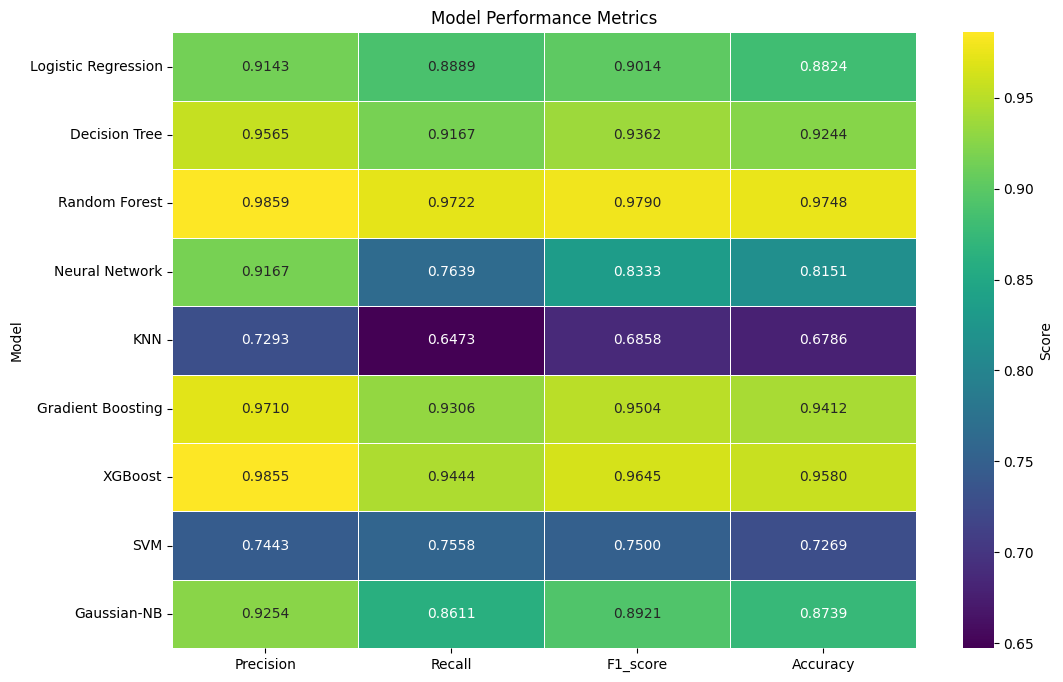

In [ ]:
# Extract all unique metric names
metric_names = set()
for results in best_model_results.values():
    metric_names.update(results['Metrics'].keys())

# Create a dictionary to hold metric data
metrics_data = {metric: [] for metric in metric_names}
metrics_data['Model'] = []

# Populate the dictionary with data
for model_name, results in best_model_results.items():
    metrics_data['Model'].append(model_name)
    for metric in metric_names:
        metrics_data[metric].append(results['Metrics'].get(metric))

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Set the model as index
metrics_df.set_index('Model', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df, annot=True, cmap='viridis', cbar_kws={'label': 'Score'}, linewidths=0.5, fmt='.4f')
plt.title('Model Performance Metrics')
plt.show()

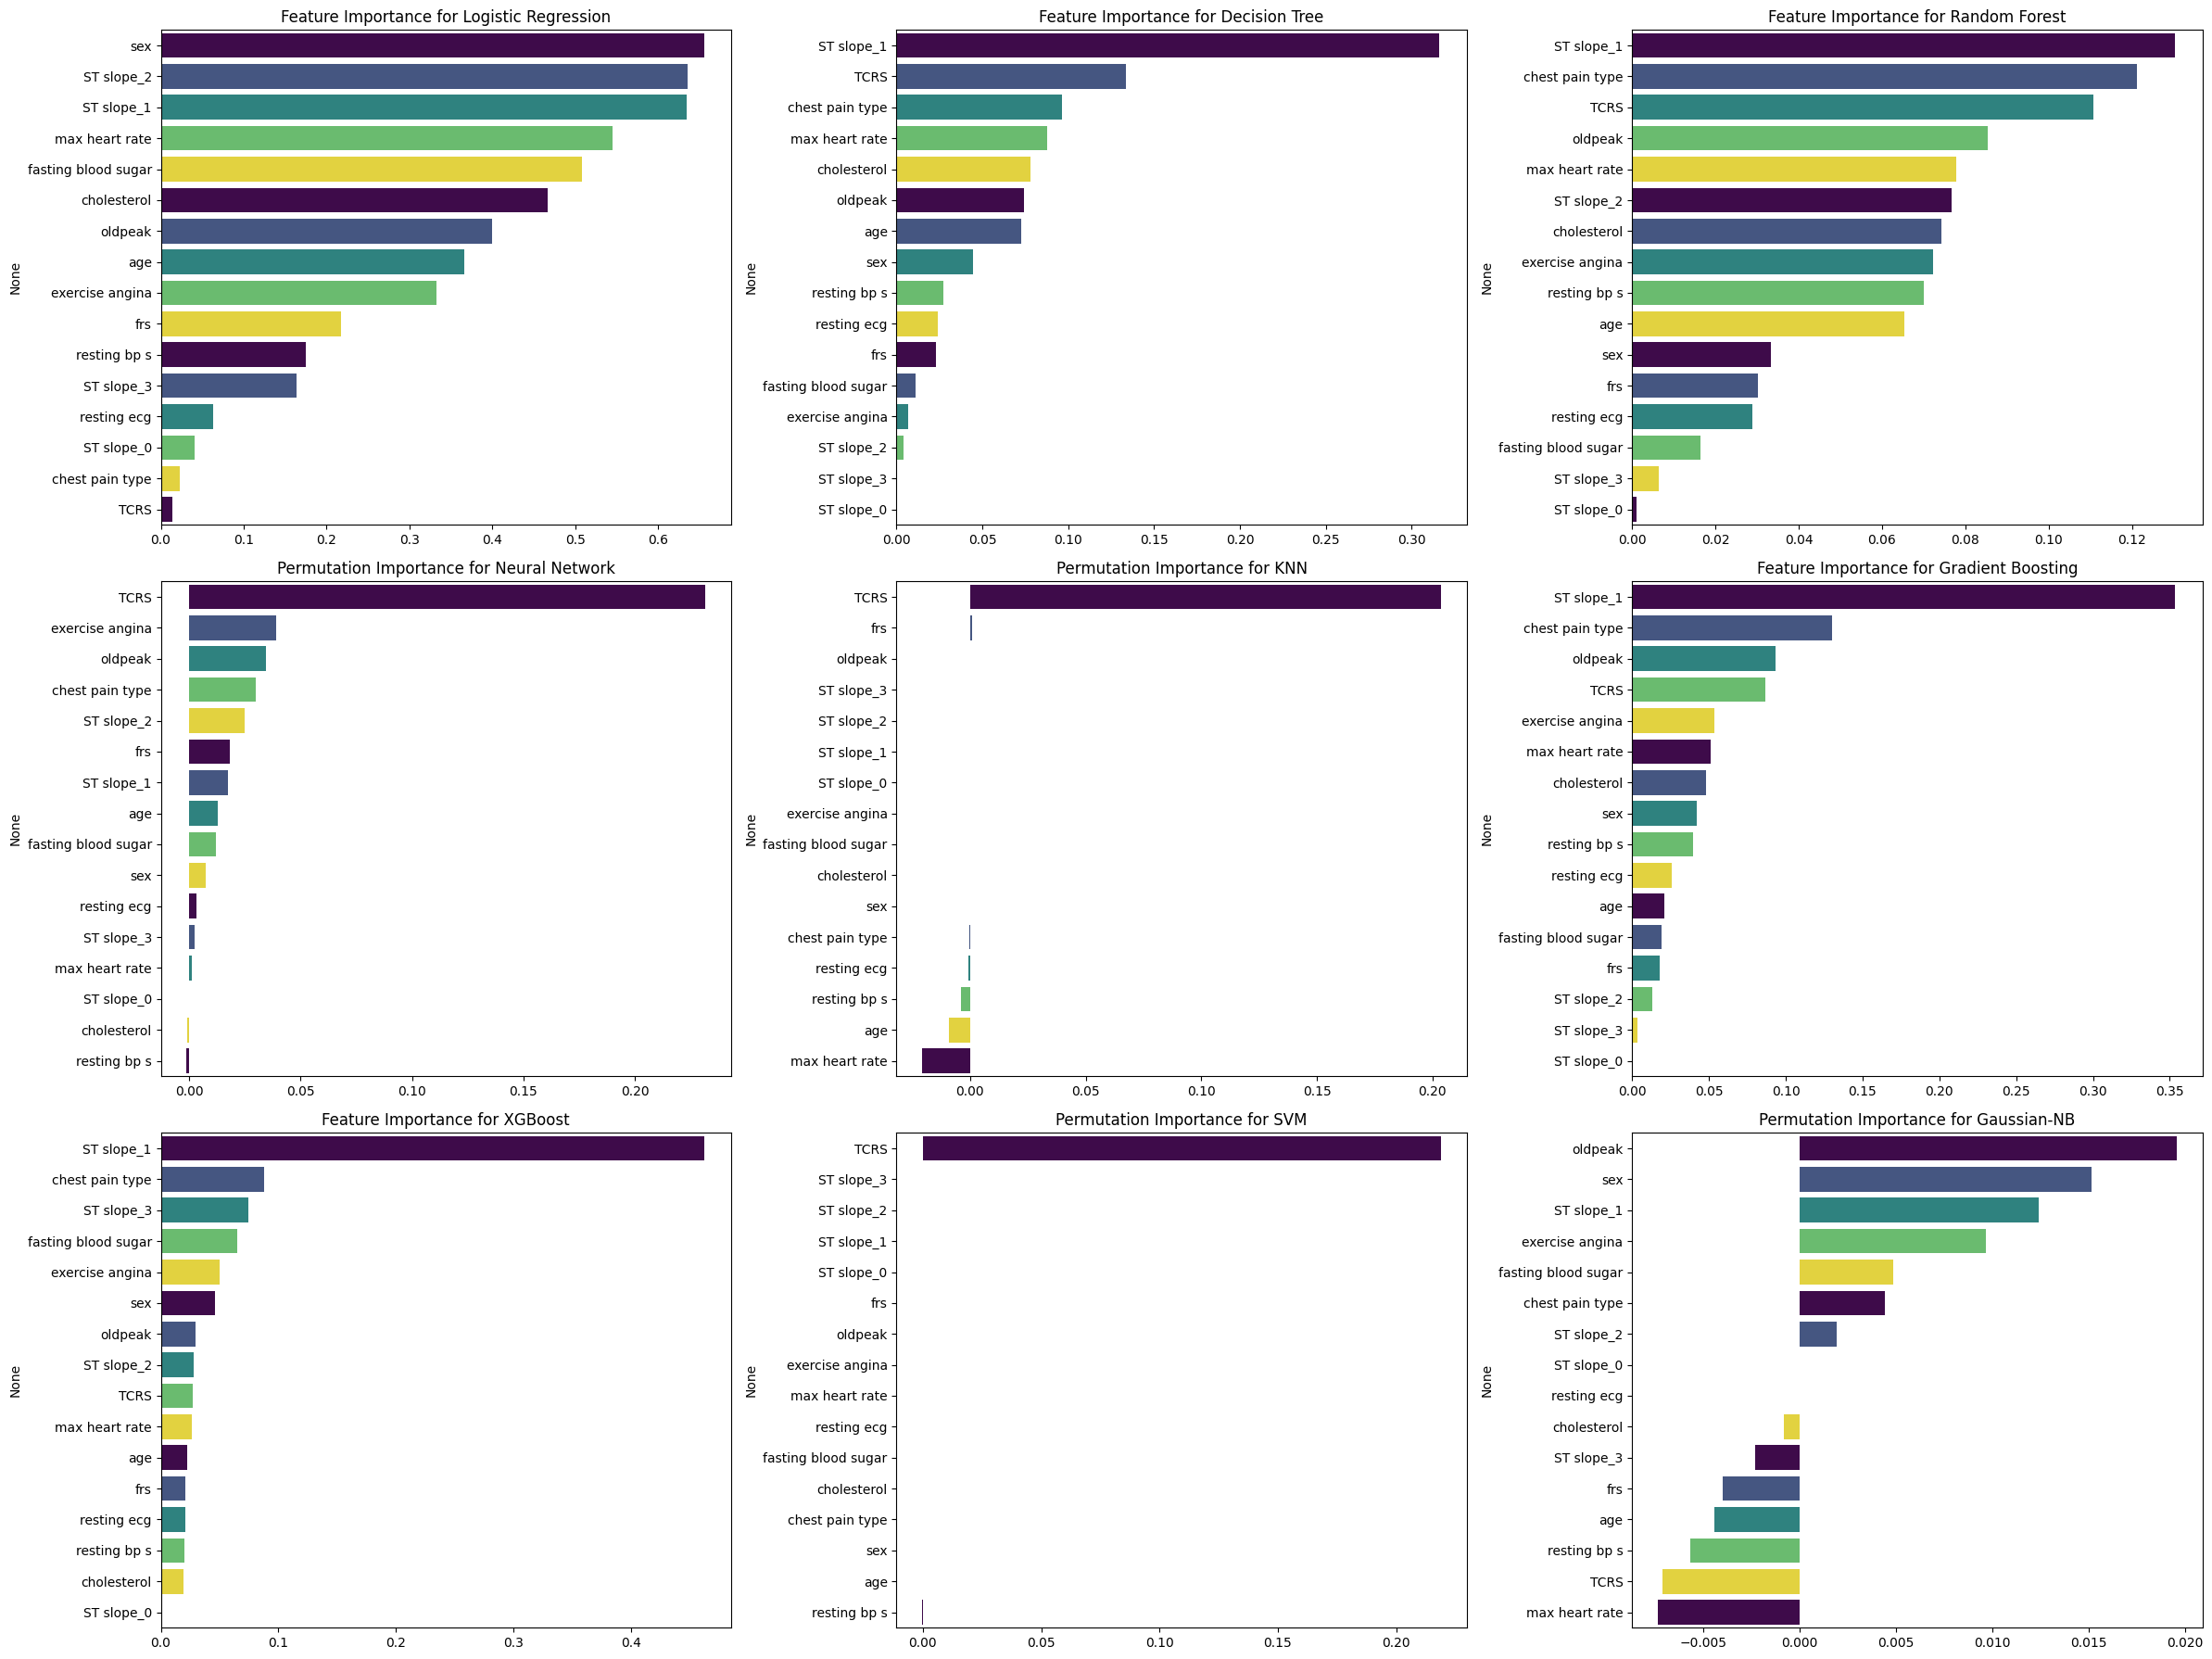

In [ ]:
# Feture importance of each model, permutation_importance for model who do not have built in future imprtance
fig, axes = plt.subplots(3, 3, figsize=(24, 18))
axes = axes.ravel()
# building barplot foe each option of importance
for ax, (model_name, model_info) in zip(axes, best_model_results.items()):
    model = model_info["Trained Model"]
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        sorted_indices = np.argsort(importances)[::-1]
        sorted_importances = importances[sorted_indices]
        sorted_features = X.columns[sorted_indices]
        sns.barplot(x=sorted_importances, y=sorted_features, ax=ax,palette=colors )
        ax.set_title(f'Feature Importance for {model_name}')
    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_).flatten()
        sorted_indices = np.argsort(importances)[::-1]
        sorted_importances = importances[sorted_indices]
        sorted_features = X.columns[sorted_indices]
        sns.barplot(x=sorted_importances, y=sorted_features, ax=ax, palette=colors)
        ax.set_title(f'Feature Importance for {model_name}')
    else:
        # Use permutation importance as a fallback
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        importances = result.importances_mean
        sorted_indices = np.argsort(importances)[::-1]
        sorted_importances = importances[sorted_indices]
        sorted_features = X.columns[sorted_indices]
        sns.barplot(x=sorted_importances, y=sorted_features, ax=ax, palette=colors)
        ax.set_title(f'Permutation Importance for {model_name}')

plt.tight_layout()
plt.show()

# Hyper Parameter Tuning

In [ ]:
# Optimization of DecisionTreeClassifier using optuna
def objective_dt(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)

    model1 = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    score = cross_val_score(model1, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study_dt = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study_dt.optimize(objective_dt, n_trials=300)
best_params_dt = study_dt.best_params
print("Best parameters for Decision Tree found: ", best_params_dt)

[I 2024-06-22 10:34:45,907] A new study created in memory with name: no-name-527a55f1-d74d-438f-acf0-955a01119042
[I 2024-06-22 10:34:45,968] Trial 0 finished with value: 0.8067333188437296 and parameters: {'max_depth': 19, 'min_samples_split': 31, 'min_samples_leaf': 24}. Best is trial 0 with value: 0.8067333188437296.
[I 2024-06-22 10:34:46,018] Trial 1 finished with value: 0.8375396652901543 and parameters: {'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.8375396652901543.
[I 2024-06-22 10:34:46,055] Trial 2 finished with value: 0.8123277548359052 and parameters: {'max_depth': 3, 'min_samples_split': 28, 'min_samples_leaf': 20}. Best is trial 1 with value: 0.8375396652901543.
[I 2024-06-22 10:34:46,100] Trial 3 finished with value: 0.819804390349924 and parameters: {'max_depth': 36, 'min_samples_split': 2, 'min_samples_leaf': 32}. Best is trial 1 with value: 0.8375396652901543.
[I 2024-06-22 10:34:46,148] Trial 4 finished with value: 0.

Best parameters for Decision Tree found:  {'max_depth': 44, 'min_samples_split': 3, 'min_samples_leaf': 1}


In [ ]:
# Optimization of RandomForestClassifier using optuna
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_categorical('max_depth', [None] + list(range(10, 21)))
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    model2 = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    score = cross_val_score(model2, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize',sampler = optuna.samplers.RandomSampler(seed=42))
study.optimize(objective, n_trials=300)
best_params = study.best_params
print("Best parameters found: ", best_params)

[I 2024-06-22 10:35:02,907] A new study created in memory with name: no-name-67ce3190-fbc0-43e2-ae80-5899244c1cfa
[I 2024-06-22 10:35:04,796] Trial 0 finished with value: 0.9178265594435991 and parameters: {'n_estimators': 106, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9178265594435991.
[I 2024-06-22 10:35:05,898] Trial 1 finished with value: 0.9066202999347969 and parameters: {'n_estimators': 77, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9178265594435991.
[I 2024-06-22 10:35:07,441] Trial 2 finished with value: 0.894479460986742 and parameters: {'n_estimators': 141, 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9178265594435991.
[I 2024-06-22 10:35:09,070] Trial 3 finished with value: 0.9075592262551619 and parameters: {'n_estimators': 150, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value:

Best parameters found:  {'n_estimators': 76, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [ ]:
# Optimization of GradientBoostingClassifier using optuna
def objective_gb(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)

    model3 = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample
    )
    score = cross_val_score(model3, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study_gb = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study_gb.optimize(objective_gb, n_trials=300)
best_params_gb = study_gb.best_params
print("Best parameters for Gradient Boosting found: ", best_params_gb)

[I 2024-06-22 10:43:37,534] A new study created in memory with name: no-name-6ec0379b-052a-4ae1-8d38-5a9ad32a7458
[I 2024-06-22 10:43:53,987] Trial 0 finished with value: 0.8991567050641166 and parameters: {'n_estimators': 437, 'max_depth': 48, 'learning_rate': 0.15702970884055384, 'min_samples_split': 20, 'min_samples_leaf': 5, 'subsample': 0.5779972601681014}. Best is trial 0 with value: 0.8991567050641166.
[I 2024-06-22 10:44:00,639] Trial 1 finished with value: 0.9140969354488157 and parameters: {'n_estimators': 152, 'max_depth': 44, 'learning_rate': 0.06358358856676251, 'min_samples_split': 23, 'min_samples_leaf': 1, 'subsample': 0.9849549260809971}. Best is trial 1 with value: 0.9140969354488157.
[I 2024-06-22 10:44:19,334] Trial 2 finished with value: 0.9038165616170397 and parameters: {'n_estimators': 850, 'max_depth': 11, 'learning_rate': 0.0035113563139704067, 'min_samples_split': 7, 'min_samples_leaf': 10, 'subsample': 0.762378215816119}. Best is trial 1 with value: 0.914096

Best parameters for Gradient Boosting found:  {'n_estimators': 876, 'max_depth': 43, 'learning_rate': 0.009063614378928195, 'min_samples_split': 27, 'min_samples_leaf': 2, 'subsample': 0.7981349392410265}


In [ ]:
# Optimization of XGBClassifier using optuna
def objective_xgb(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    param = {
        'verbosity': 0,
        'max_depth': trial.suggest_int('max_depth', 3, 5),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 200),
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.8, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 0.1, 0.2),

    }

    model4 = xgb.XGBClassifier(**param)
    score = cross_val_score(model4, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

study_xgb = optuna.create_study(direction='maximize', sampler=optuna.samplers.RandomSampler(seed=42))
study_xgb.optimize(objective_xgb, n_trials=300)
best_params_xgb = study_xgb.best_params
print("Best parameters for XGBoost found: ", best_params_xgb)

[I 2024-06-22 11:33:56,851] A new study created in memory with name: no-name-b196006b-8c2d-42ce-b238-00ddffde659b
[I 2024-06-22 11:33:58,892] Trial 0 finished with value: 0.9140838948054771 and parameters: {'max_depth': 4, 'learning_rate': 0.08927180304353628, 'n_estimators': 173, 'subsample': 0.9197316968394074, 'colsample_bytree': 0.8312037280884873, 'gamma': 0.11141894188819904}. Best is trial 0 with value: 0.9140838948054771.
[I 2024-06-22 11:33:59,281] Trial 1 finished with value: 0.888871984351228 and parameters: {'max_depth': 3, 'learning_rate': 0.07348118405270448, 'n_estimators': 160, 'subsample': 0.941614515559209, 'colsample_bytree': 0.8041168988591605, 'gamma': 0.1958718199433427}. Best is trial 0 with value: 0.9140838948054771.
[I 2024-06-22 11:33:59,828] Trial 2 finished with value: 0.8814170832427732 and parameters: {'max_depth': 5, 'learning_rate': 0.016305687346221478, 'n_estimators': 118, 'subsample': 0.8366809019706868, 'colsample_bytree': 0.8608484485919076, 'gamma'

Best parameters for XGBoost found:  {'max_depth': 5, 'learning_rate': 0.07856097010829145, 'n_estimators': 151, 'subsample': 0.9064226970530631, 'colsample_bytree': 0.8214344022679553, 'gamma': 0.13635923084036977}


# Optimized Models

              precision    recall  f1-score   support

           0     0.8491    0.9574    0.9000        47
           1     0.9697    0.8889    0.9275        72

    accuracy                         0.9160       119
   macro avg     0.9094    0.9232    0.9138       119
weighted avg     0.9220    0.9160    0.9167       119



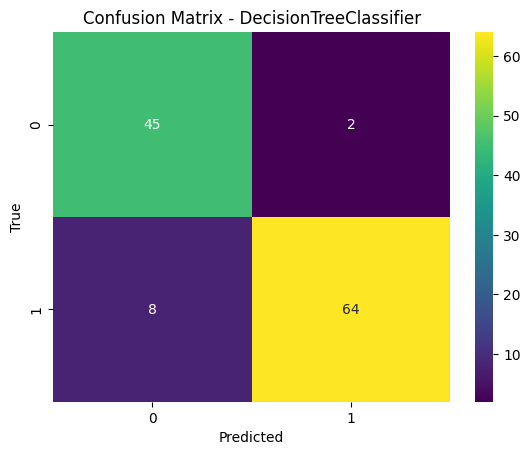

In [ ]:
# Define train and test size after optimization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#optimized DecisionTreeClassifier and confusion matrix
modeldt= DecisionTreeClassifier(max_depth=44, min_samples_split=3, min_samples_leaf=1)
modeldt.fit(X_train, y_train)
predict =  modeldt.predict(X_test)
print(classification_report(y_test, predict,digits=4))

cm = confusion_matrix(y_test, predict)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0     0.9200    0.9787    0.9485        47
           1     0.9855    0.9444    0.9645        72

    accuracy                         0.9580       119
   macro avg     0.9528    0.9616    0.9565       119
weighted avg     0.9596    0.9580    0.9582       119



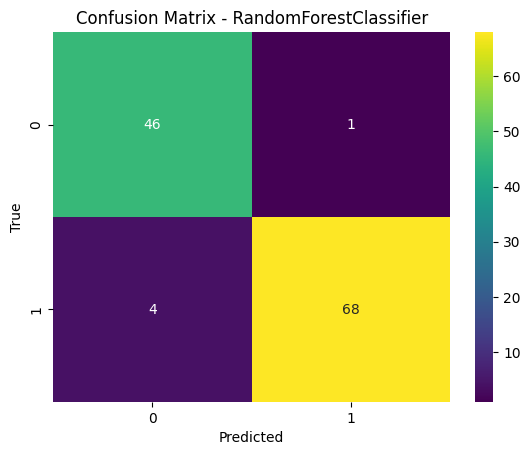

In [ ]:
# Define train and test size after optimization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#optimized RandomForestClassifier and confusion matrix
modelrf = RandomForestClassifier(n_estimators=76, max_depth=20, min_samples_split=2, min_samples_leaf=1)
modelrf.fit(X_train, y_train)
predict =  modelrf.predict(X_test)
print(classification_report(y_test, predict, digits=4))

cm = confusion_matrix(y_test, predict)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0     0.9200    0.9787    0.9485        47
           1     0.9855    0.9444    0.9645        72

    accuracy                         0.9580       119
   macro avg     0.9528    0.9616    0.9565       119
weighted avg     0.9596    0.9580    0.9582       119



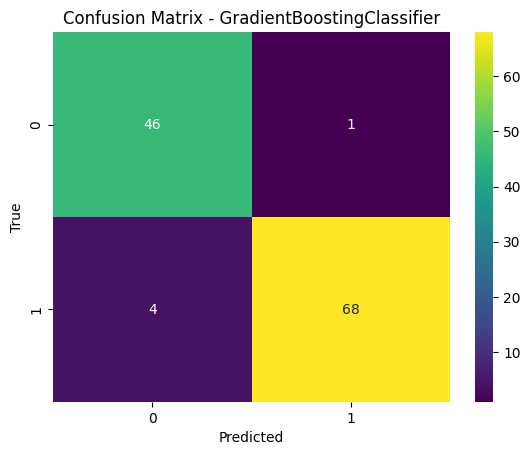

In [ ]:
# Define train and test size after optimization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#optimized GradientBoostingClassifier and confusion matrix
modelgb = GradientBoostingClassifier(n_estimators= 876, max_depth=43, learning_rate=  0.009063614378928195, min_samples_split=27, min_samples_leaf=2, subsample=0.7981349392410265)
modelgb.fit(X_train, y_train)
predict =  modelgb.predict(X_test)
print(classification_report(y_test, predict,digits=4))

cm = confusion_matrix(y_test, predict)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.title('Confusion Matrix - GradientBoostingClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0     0.9184    0.9574    0.9375        47
           1     0.9714    0.9444    0.9577        72

    accuracy                         0.9496       119
   macro avg     0.9449    0.9509    0.9476       119
weighted avg     0.9505    0.9496    0.9497       119



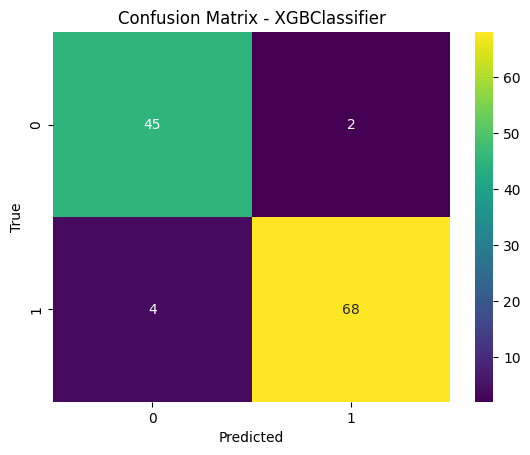

In [ ]:
# Define train and test size after optimization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Optimized XGBClassifier and confusion matrix
modelx = xgb.XGBClassifier(colsample_bytree=0.8214344022679553, gamma=0.13635923084036977, learning_rate=0.07856097010829145, max_depth=5, n_estimators=151, subsample=0.9064226970530631)
modelx.fit(X_train, y_train)
predict =  modelx.predict(X_test)
print(classification_report(y_test, predict,digits =4))

cm = confusion_matrix(y_test, predict)
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
plt.title('Confusion Matrix - XGBClassifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()